# Assignment3 (Homework5)

Due: **Apr. 4 23:59**

# Your information
------
*Name*: 俞嘉力 <br>
*Student ID*: 515260910007 <br>
*Assignment NO.*: hw3<br>

# The librarys you need

1. In assignment III, in principle only the following libraries are allowed: 
    * numpy
    * pandas
    * matplotlib 
    * scipy
    * re
    * pyqt
    * tk
    * os
    * sys
    * collections.defaultdict
    * flex/bison related libraries

# Requirement
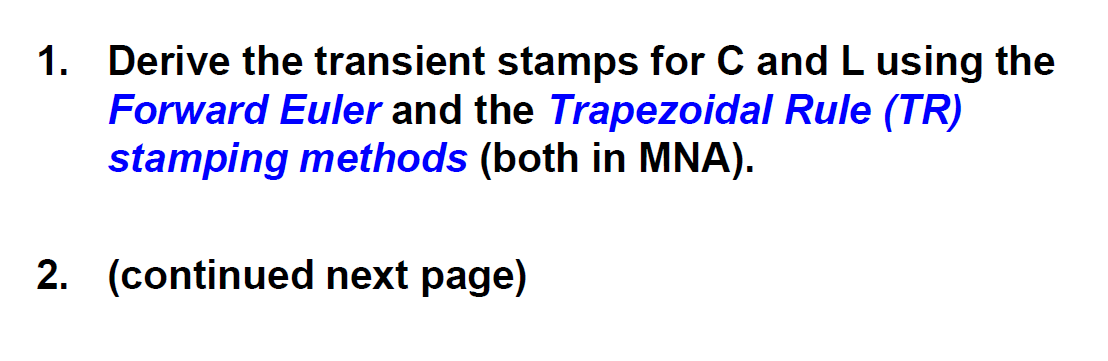
___

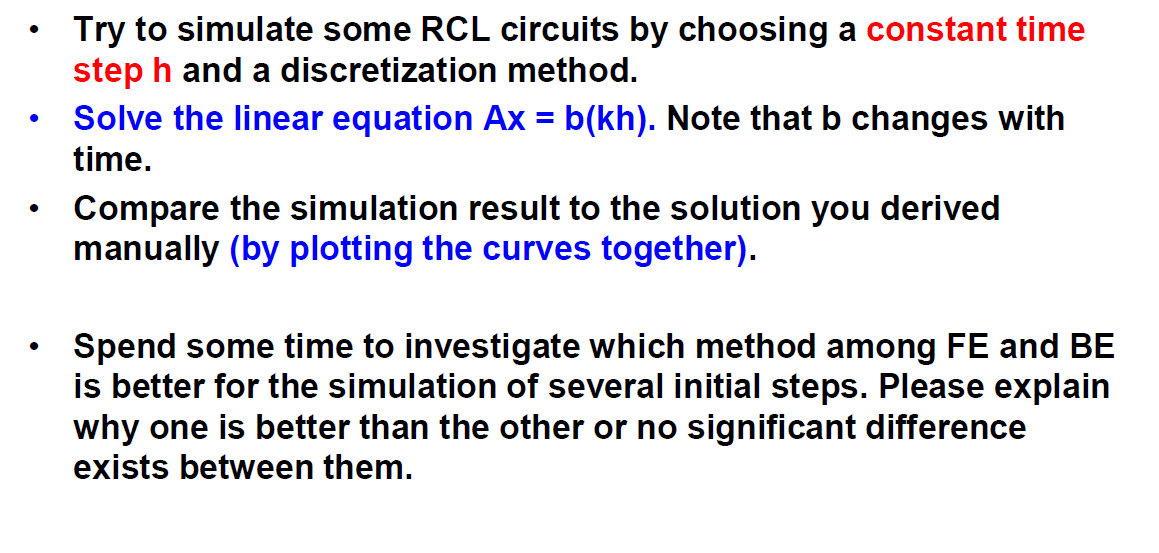

# Your Idea
------
**Describe your ideas here, how to implement this assignment, including the construction of test cases. This paragraph is included in the score. Also, it is best to have a flowchart.**


I first deduce the MNA stamp of capacitor and inductor with method FE and TRAP, and the derived matrix are:

Capacitor:
    TRAN BE
        +    -    i   |  RHS
                      |   
    +   0    0    1   |   0
                      |
    -   0    0    -1  |   0
                      |
    br C/h  -C/h  -1  |  C/h*v(t-h)
                      

    TRAN FE
        +    -    i   |  RHS
                      |   
    +   0    0    1   |   0
                      |
    -   0    0    -1  |   0
                      |
    br C/h -C/h   0   |  i(t-h)+C/h*v(t-h)
                      |
    
    TRAN TRAP
        +    -    i   |  RHS
                      |   
    +   0    0    1   |   0
                      |
    -   0    0    -1  |   0
                      |
    br 2C/h -2C/h -1  |  i(t-h)+2C/h*v(t-h)
                      |
    
Inductor: 
    TRAN BE
        +    -    i   |  RHS
                      |   
    +   0    0    1   |   0
                      |
    -   0    0    -1  |   0
                      |
    br  1   -1   -L/h |  -L/h*i(t-h)
                      |
    TRAN FE
        +    -    i   |  RHS
                      |   
    +   0    0    1   |   0
                      |
    -   0    0    -1  |   0
                      |
    br  0    0    1   |  i(t-h)+h/L*v(t-h)
                      |
    
    TRAN TRAP
        +    -    i   |  RHS
                      |   
    +   0    0    1   |   0
                      |
    -   0    0   -1   |   0
                      |
    br  -1   1   2L/h |  2L/h*i(t-h)+i(t-h)
                      |
   

According to the matrix above, and the step and stop point appointed by user functions, we can iterate the result vector. A single one iteration result is saved in a vector, and all of the iterations' result can be saved in a matrix. These steps are solved by function stampingTRAP, stampingFE and stampingBE.

Then, we can easily draw the FE, BE and TRAP graph with matplotlib.

___
**Your flowchart here**
==================
![avatar](./pic/edaHW3.jpg)

# Your code & result

------
*We encourage object-oriented programming (plus points), calling your code here.
<br>You should not place all the code in jupyter, just execute the interface you wrap.*
<br>
**You are supposed to make sure that your source code and output are readable.<br> Comments in the code are required.**

The first circuit is displayed below. 
![avatar](./pic/hw3test2.jpg)
We assume: 

V = 10 <br />
R = 5 <br />
L = 4 <br />
C = 3 <br />

$$V_2(t) = 10u(t) - 10(e^{-\frac{1}{30}t}cos\frac{\sqrt{37}}{3\sqrt{50}}t + \frac{\sqrt{50}}{10\sqrt{37}}e^{-\frac{1}{30}t}sin\frac{\sqrt{37}}{3\sqrt{50}})u(t) $$

Start parser now. 

device {'deviceType': 'V', 'name': 'V1', 'connectionPoints': (1, 0), 'DC': 10.0}
device {'deviceType': 'R', 'name': 'R2', 'connectionPoints': (1, 2), 'value': 5.0}
device {'deviceType': 'L', 'name': 'L3', 'connectionPoints': (1, 2), 'value': 4.0}
device {'deviceType': 'C', 'name': 'C4', 'connectionPoints': (2, 0), 'value': 3.0}


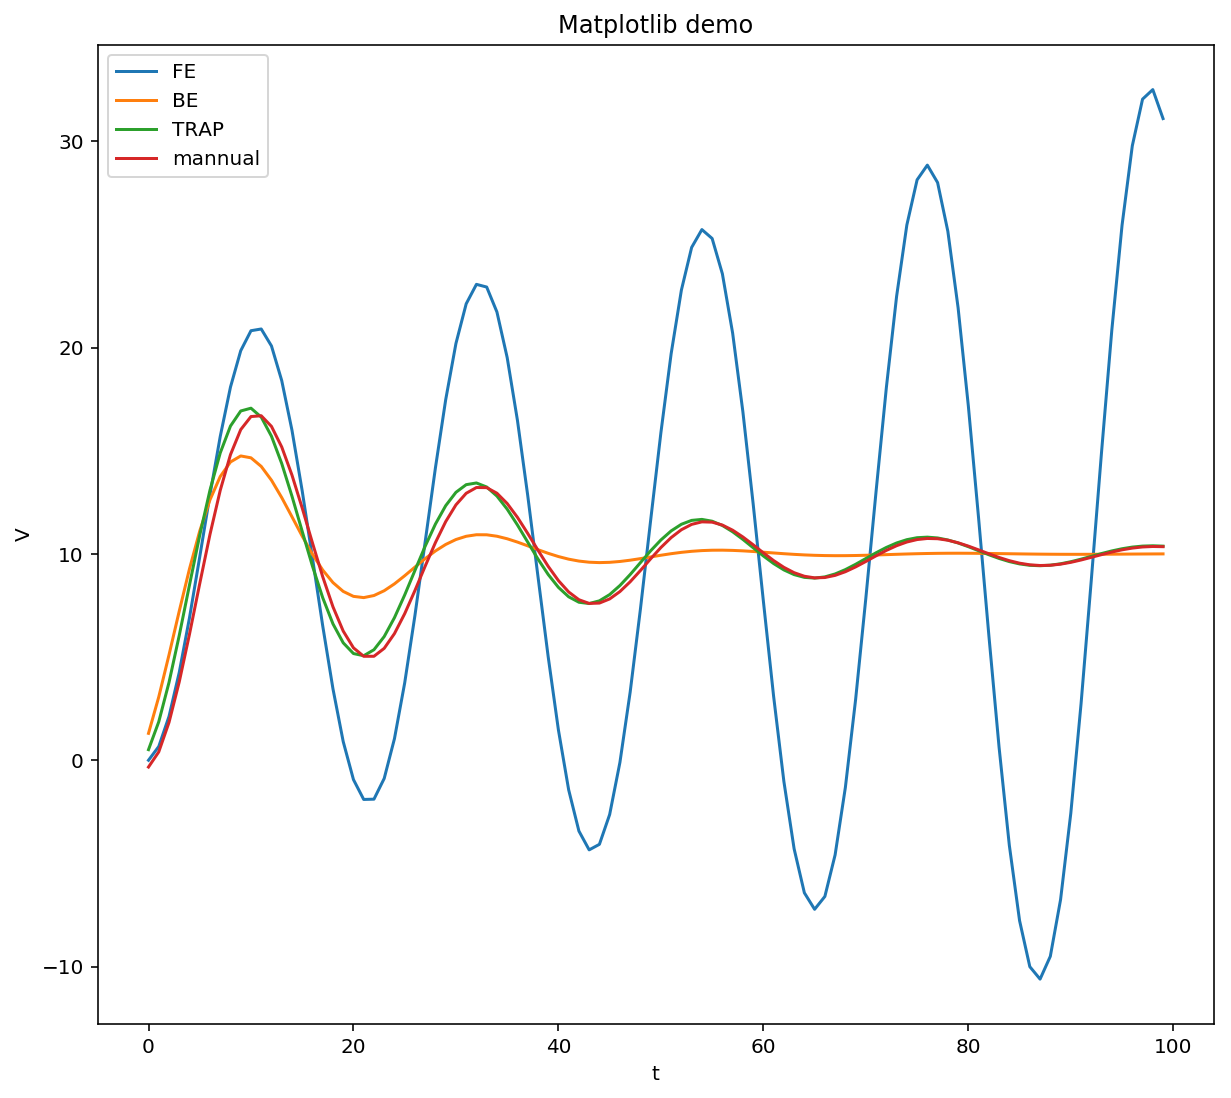

In [7]:
# *Your code here
# *Example code
# *Note that even if you tend to provide a nice GUI, the following code is also required.
import numpy as np
from Spice import Spice
netlist = """
*netlist example 1
V1 1 0 10
R2 1 2 5
L3 1 2 4
C4 2 0 3
.end
"""
step = 1
stop = 100

mySpice = Spice()
mySpice.clean()
mySpice.parse(netlist)
mySpice.solveTran(method='BE', step=step, stop = stop)
mySpice.solveTran(method='FE', step=step, stop = stop)
mySpice.solveTran(method='TRAP', step=step, stop = stop)

# mannual result
x = np.arange(0, stop * step, step) 
ym = 10 - 10 * ((np.exp(-1/30*x) * np.cos(np.sqrt(37) / (3*np.sqrt(50)) * x)) + \
                 np.exp(-1/30*x) * np.sin(np.sqrt(37) / (3*np.sqrt(50))) * np.sqrt(50) / (10*np.sqrt(37)))

mySpice.plotTran(step=step, stop = stop, mannual=ym)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

**Explain the difference, which is one is better? **

We can easily noticed that trapzoidal method is better than forward euler.
1. We can compare the curves with the mannual one. As the manuual one is the accurate curve we need to emulate, the trapzoidal method is more similar than the forward euler.
2. If we expand the step from 0.1 to 1, the FE method will lead to a non convergence result
   ![avatar](./pic/hw3FE.jpg)

$$V_2(t) = u(t) + 9 (e^{-\frac{11}{100}t}cos\frac{3\sqrt{31}}{100}t + \frac{11}{3\sqrt{31}}e^{-\frac{11}{100}t}sin\frac{3\sqrt{31}}{100}t)u(t) $$

The second demo circuit is displayed below.
![avatar](./pic/hw3test2.jpg)
We assume: 
V = 10 <br />
R1 = 1 <br />
R2 = 0.1 <br />
L = 5 <br />
C = 5 <br />

Start parser now. 

device {'deviceType': 'V', 'name': 'V1', 'connectionPoints': (1, 0), 'DC': 10.0}
device {'deviceType': 'C', 'name': 'C2', 'connectionPoints': (1, 2), 'value': 5.0}
device {'deviceType': 'R', 'name': 'R5', 'connectionPoints': (1, 2), 'value': 1.0}
device {'deviceType': 'L', 'name': 'L3', 'connectionPoints': (2, 3), 'value': 5.0}
device {'deviceType': 'R', 'name': 'R4', 'connectionPoints': (3, 0), 'value': 0.1}


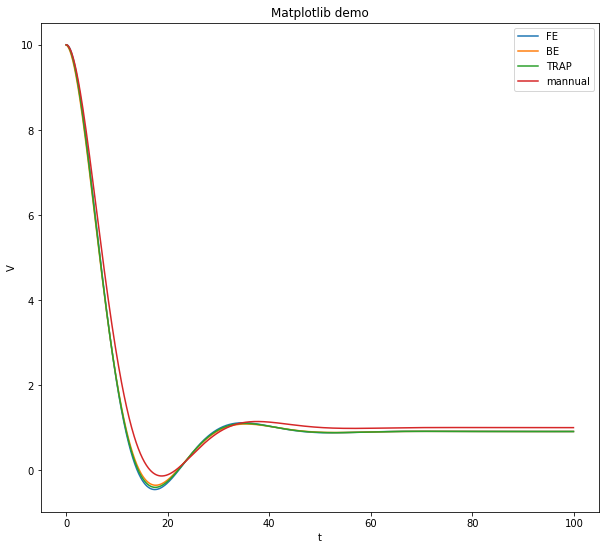

In [2]:
netlist = '''
*netlist example 2
V1 1 0 10
C2 1 2 5
R5 1 2 1
L3 2 3 5
R4 3 0 0.1
'''
# Try to simulate a complex netlist
#your_h_val = 1e-3 # change it
#solver.clear()
#solver.solve(netlist2, method = "FE", h = your_h_val) # forward euler
#solver.solve(netlist2, method = "TR", h = your_h_val) # trapezoidal rule
#solver.plot_all() # plot the curves together, include FE, TR and your manually derived equation
from Spice import Spice
import numpy as np
step = 0.1
stop = 1000

mySpice = Spice()
mySpice.clean()
mySpice.parse(netlist)
mySpice.solveTran(method='BE', step=step, stop = stop)
mySpice.solveTran(method='FE', step=step, stop = stop)
mySpice.solveTran(method='TRAP', step=step, stop = stop)

#mannual result
x = np.arange(0, stop * step, step) 
ym = 1 + 9 * (np.exp(-11/100*x)*np.cos(3*np.sqrt(31)/100*x) + np.exp(-11/100*x)*np.sin(3*np.sqrt(31)/100*x)*11/3/np.sqrt(31))

mySpice.plotTran(step=step, stop = stop, mannual=ym)

___
# Grading Policy

1. The plagiarized code is 0 points, including the plagiarized.
2. Document and flow chart score.
3. Code quality and scalability score.
4. The code, unable to reproduce the code in my environment, will lead to zero points.
5. Excessive reliance on third-party libraries will reduce points.
6. Students who can make additional graphical interfaces get proper points.
7. Late assignments are deducted by day.
8. The deadline for the assignment is **7 days after the class**. <br>For example, the assignment I is delivered in March 11, and the deadline is 23:59 on March 18.
9. The job submission address is *public.sjtu.edu.cn*, the user name is **sjtuyuhao1995**, and the password is **public**.<br> Package the **ipynb file** and your **python files**, the text files of the **test netlists**, or the extra **pdf description**, and name it ‘studentNumber_name_HWX.zip’(e.g. **51403090011_HengZhang_HW2.zip**), and finally upload it to the corresponding directory.